In [91]:
!pip install python-whois
!pip install tld
!pip install googlesearch-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import pandas as pd
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import os
import socket
import whois
from datetime import datetime
import time
from bs4 import BeautifulSoup
import urllib
import bs4
import os

In [89]:
# %reset -f


In [90]:
import pandas as pd
df = pd.read_csv('/content/newGrand.csv')
print(df.shape)
df.head()

(6498946, 2)


,URL,Label
0,http://example.com,Benign
1,"http://example.com/ga$F[N3$2(/?IxL`s#""VgTO(/&8...",Benign
2,"http://example.com/}q10Be_G/LT8h6t""FXw@LF""4A|G...",Benign
3,"http://example.com/m@/>dIBFJ#WF,yK/2efp?F4a^89...",Benign
4,http://example.com/ylh0RLb=}iJfBgX~2>,Benign


In [93]:
df.Label.value_counts()

Benign       3613647
Malicious    2885299
Name: Label, dtype: int64

In [8]:
# df['type'] = df['type'].apply(lambda x: 'benign' if x == 'benign' else 'malicious')


In [94]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
# df['use_of_ip'] = df['URL'].apply(lambda i: having_ip_address(i))

In [44]:
# !cp /content/drive/MyDrive/MCS/MCS9thMarch/fakeBenignAndMaliciousBiggerLinks/grand.csv /content

In [46]:
# !cp /content/drive/MyDrive/MCS/MCS9thMarch/combine_links_github_asli_fake_newFake/combine_links_github_asli_fake_newFake.csv /content

In [47]:
# import pandas as pd

# # Read the first CSV file with header
# df1 = pd.read_csv("/content/grand.csv")


# # Read the second CSV file without header
# df2 = pd.read_csv("/content/combine_links_github_asli_fake_newFake.csv", header=None, names=df1.columns)

# # Concatenate the two dataframes
# df3 = pd.concat([df1, df2], ignore_index=True)

# # Save the concatenated dataframe to a new CSV file
# df3.to_csv("/content/newGrand.csv", index=False)


In [50]:
# import pandas as pd

# # Read the contents of CSV file c into a pandas DataFrame
# df_c = pd.read_csv('/content/newGrand.csv')

# # Get the number of rows and columns in df_c
# num_rows, num_cols = df_c.shape
# print(f"Number of rows: {num_rows}")
# print(f"Number of columns: {num_cols}")

# # Get the column names in df_c
# column_names = df_c.columns.tolist()
# print(f"Column names: {column_names}")

# # Get the value counts of the "Label" column
# label_counts = df_c["Label"].value_counts()
# print(f"Label value counts:\n{label_counts}")


Number of rows: 6498946
Number of columns: 2
Column names: ['URL', 'Label']
Label value counts:
Benign       3613647
Malicious    2885299
Name: Label, dtype: int64


In [49]:
# import pandas as pd

# # Read the contents of the CSV file into a pandas DataFrame
# df = pd.read_csv('/content/newGrand.csv')

# # Drop rows with "label" or "Label" in the "Label" column
# df_clean = df.drop(df[(df["Label"] == "label") | (df["Label"] == "Label")].index)

# # Write the cleaned DataFrame to a new CSV file
# df_clean.to_csv('/content/newGrand.csv', index=False)


In [10]:
# from urllib.parse import urlparse

# def abnormal_url(url):
#     hostname = urlparse(url).hostname
#     hostname = str(hostname)
#     match = re.search(hostname, url)
#     if match:
#         # print match.group()
#         return 1
#     else:
#         # print 'No matching pattern found'
#         return 0


# df['abnormal_url'] = df['URL'].apply(lambda i: abnormal_url(i))

In [58]:
# df.use_of_ip.value_counts()

0    6498945
1          1
Name: use_of_ip, dtype: int64

In [95]:

df.head()

,URL,Label
0,http://example.com,Benign
1,"http://example.com/ga$F[N3$2(/?IxL`s#""VgTO(/&8...",Benign
2,"http://example.com/}q10Be_G/LT8h6t""FXw@LF""4A|G...",Benign
3,"http://example.com/m@/>dIBFJ#WF,yK/2efp?F4a^89...",Benign
4,http://example.com/ylh0RLb=}iJfBgX~2>,Benign


In [96]:
df['count.'] = df['URL'].apply(lambda i: i.count('.'))
df.head()

,URL,Label,count.
0,http://example.com,Benign,1
1,"http://example.com/ga$F[N3$2(/?IxL`s#""VgTO(/&8...",Benign,3
2,"http://example.com/}q10Be_G/LT8h6t""FXw@LF""4A|G...",Benign,1
3,"http://example.com/m@/>dIBFJ#WF,yK/2efp?F4a^89...",Benign,4
4,http://example.com/ylh0RLb=}iJfBgX~2>,Benign,1


In [97]:
df['count-www'] = df['URL'].apply(lambda i: i.count('www'))
df['count@'] = df['URL'].apply(lambda i: i.count('@'))
from urllib.parse import urlparse
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['URL'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['URL'].apply(lambda i: no_of_embed(i))
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['URL'].apply(lambda i: shortening_service(i))

In [99]:
df.head()

,URL,Label,count.,count-www,count@,count_dir,count_embed_domian,short_url
0,http://example.com,Benign,1,0,0,0,0,0
1,"http://example.com/ga$F[N3$2(/?IxL`s#""VgTO(/&8...",Benign,3,0,2,2,0,0
2,"http://example.com/}q10Be_G/LT8h6t""FXw@LF""4A|G...",Benign,1,0,1,4,0,0
3,"http://example.com/m@/>dIBFJ#WF,yK/2efp?F4a^89...",Benign,4,0,2,2,0,0
4,http://example.com/ylh0RLb=}iJfBgX~2>,Benign,1,0,0,1,0,0


In [100]:
# find the maximum length of the first column
max_len = max(df.iloc[:, 0].str.len())

print("Maximum length of first column section:", max_len)

Maximum length of first column section: 824


In [101]:
df['count-https'] = df['URL'].apply(lambda i : i.count('https'))
df['count-http'] = df['URL'].apply(lambda i : i.count('http'))

In [102]:
df.head()

,URL,Label,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http
0,http://example.com,Benign,1,0,0,0,0,0,0,1
1,"http://example.com/ga$F[N3$2(/?IxL`s#""VgTO(/&8...",Benign,3,0,2,2,0,0,0,1
2,"http://example.com/}q10Be_G/LT8h6t""FXw@LF""4A|G...",Benign,1,0,1,4,0,0,0,1
3,"http://example.com/m@/>dIBFJ#WF,yK/2efp?F4a^89...",Benign,4,0,2,2,0,0,0,1
4,http://example.com/ylh0RLb=}iJfBgX~2>,Benign,1,0,0,1,0,0,0,1


In [103]:
df['count%'] = df['URL'].apply(lambda i: i.count('%'))
df['count?'] = df['URL'].apply(lambda i: i.count('?'))
df['count-'] = df['URL'].apply(lambda i: i.count('-'))
df['count='] = df['URL'].apply(lambda i: i.count('='))
#Length of URL
df['url_length'] = df['URL'].apply(lambda i: len(str(i)))
#Hostname Length
# df['hostname_length'] = df['URL'].apply(lambda i: len(urlparse(i).netloc))

df.head()

,URL,Label,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length
0,http://example.com,Benign,1,0,0,0,0,0,0,1,0,0,0,0,18
1,"http://example.com/ga$F[N3$2(/?IxL`s#""VgTO(/&8...",Benign,3,0,2,2,0,0,0,1,0,2,0,2,136
2,"http://example.com/}q10Be_G/LT8h6t""FXw@LF""4A|G...",Benign,1,0,1,4,0,0,0,1,3,1,3,0,123
3,"http://example.com/m@/>dIBFJ#WF,yK/2efp?F4a^89...",Benign,4,0,2,2,0,0,0,1,0,2,1,0,113
4,http://example.com/ylh0RLb=}iJfBgX~2>,Benign,1,0,0,1,0,0,0,1,0,0,0,1,37


In [104]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
# df['sus_url'] = df['URL'].apply(lambda i: suspicious_words(i))

In [105]:
df.head()

,URL,Label,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length
0,http://example.com,Benign,1,0,0,0,0,0,0,1,0,0,0,0,18
1,"http://example.com/ga$F[N3$2(/?IxL`s#""VgTO(/&8...",Benign,3,0,2,2,0,0,0,1,0,2,0,2,136
2,"http://example.com/}q10Be_G/LT8h6t""FXw@LF""4A|G...",Benign,1,0,1,4,0,0,0,1,3,1,3,0,123
3,"http://example.com/m@/>dIBFJ#WF,yK/2efp?F4a^89...",Benign,4,0,2,2,0,0,0,1,0,2,1,0,113
4,http://example.com/ylh0RLb=}iJfBgX~2>,Benign,1,0,0,1,0,0,0,1,0,0,0,1,37


In [107]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

# df['fd_length'] = df['URL'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
# df['tld'] = df['URL'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

# df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [108]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['URL'].apply(lambda i: digit_count(i))

In [109]:
df.head()

,URL,Label,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,count-digits
0,http://example.com,Benign,1,0,0,0,0,0,0,1,0,0,0,0,18,0
1,"http://example.com/ga$F[N3$2(/?IxL`s#""VgTO(/&8...",Benign,3,0,2,2,0,0,0,1,0,2,0,2,136,18
2,"http://example.com/}q10Be_G/LT8h6t""FXw@LF""4A|G...",Benign,1,0,1,4,0,0,0,1,3,1,3,0,123,9
3,"http://example.com/m@/>dIBFJ#WF,yK/2efp?F4a^89...",Benign,4,0,2,2,0,0,0,1,0,2,1,0,113,10
4,http://example.com/ylh0RLb=}iJfBgX~2>,Benign,1,0,0,1,0,0,0,1,0,0,0,1,37,2


In [70]:
# df = df.drop("tld",1)

<ipython-input-70-beaedf415f7f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("tld",1)


In [71]:
df.head()

,URL,Label,use_of_ip,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length
0,http://example.com,Benign,0,1,0,0,0,0,0,0,1,0,0,0,0,18,11,0,0,3
1,"http://example.com/ga$F[N3$2(/?IxL`s#""VgTO(/&8...",Benign,0,3,0,2,2,0,0,0,1,0,2,0,2,136,11,0,10,3
2,"http://example.com/}q10Be_G/LT8h6t""FXw@LF""4A|G...",Benign,0,1,0,1,4,0,0,0,1,3,1,3,0,123,11,0,8,3
3,"http://example.com/m@/>dIBFJ#WF,yK/2efp?F4a^89...",Benign,0,4,0,2,2,0,0,0,1,0,2,1,0,113,11,0,2,3
4,http://example.com/ylh0RLb=}iJfBgX~2>,Benign,0,1,0,0,1,0,0,0,1,0,0,0,1,37,11,0,18,3


In [110]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["Label"])
df["type_code"].value_counts()

0    3613647
1    2885299
Name: type_code, dtype: int64

In [111]:
df.head()

,URL,Label,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,count-digits,type_code
0,http://example.com,Benign,1,0,0,0,0,0,0,1,0,0,0,0,18,0,0
1,"http://example.com/ga$F[N3$2(/?IxL`s#""VgTO(/&8...",Benign,3,0,2,2,0,0,0,1,0,2,0,2,136,18,0
2,"http://example.com/}q10Be_G/LT8h6t""FXw@LF""4A|G...",Benign,1,0,1,4,0,0,0,1,3,1,3,0,123,9,0
3,"http://example.com/m@/>dIBFJ#WF,yK/2efp?F4a^89...",Benign,4,0,2,2,0,0,0,1,0,2,1,0,113,10,0
4,http://example.com/ylh0RLb=}iJfBgX~2>,Benign,1,0,0,1,0,0,0,1,0,0,0,1,37,2,0


In [74]:
df = df.drop("Label",1)

<ipython-input-74-731b5beba670>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("Label",1)


In [75]:
df = df.drop("URL",1)

<ipython-input-75-e779a5630762>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("URL",1)


In [82]:
df.head()

,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,tld_length,type_code
0,1,0,0,0,0,0,0,1,0,0,0,0,18,3,0
1,3,0,2,2,0,0,0,1,0,2,0,2,136,3,0
2,1,0,1,4,0,0,0,1,3,1,3,0,123,3,0
3,4,0,2,2,0,0,0,1,0,2,1,0,113,3,0
4,1,0,0,1,0,0,0,1,0,0,0,1,37,3,0


In [81]:
import gc
gc.collect()


60

In [ ]:
# del df['fd_length']


In [77]:
df = df.drop("use_of_ip",1)

<ipython-input-77-84b87ebc3bac>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("use_of_ip",1)


In [79]:
df = df.drop("hostname_length",1)
df = df.drop("sus_url",1)
df = df.drop("fd_length",1)

<ipython-input-79-02cd248240d5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("hostname_length",1)
<ipython-input-79-02cd248240d5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("sus_url",1)
<ipython-input-79-02cd248240d5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("fd_length",1)


In [34]:
# df = df.drop("tld_length",1)
# df = df.drop("count-http",1)
# df = df.drop("count-https",1)

<ipython-input-34-699122661a16>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("tld_length",1)
<ipython-input-34-699122661a16>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("count-http",1)
<ipython-input-34-699122661a16>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("count-https",1)


In [114]:
del df['Label']
del df['URL']

In [117]:
# del df['tld_length']
del df['count-http']
del df['count-https']

In [118]:
df.head()

,count.,count-www,count@,count_dir,count_embed_domian,short_url,count%,count?,count-,count=,url_length,count-digits,type_code
0,1,0,0,0,0,0,0,0,0,0,18,0,0
1,3,0,2,2,0,0,0,2,0,2,136,18,0
2,1,0,1,4,0,0,3,1,3,0,123,9,0
3,4,0,2,2,0,0,0,2,1,0,113,10,0
4,1,0,0,1,0,0,0,0,0,1,37,2,0


In [119]:
cols = df.columns.tolist()
cols_str = "', '".join(cols)
cols_str = f"'{cols_str}'"
print(cols_str)

'count.', 'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url', 'count%', 'count?', 'count-', 'count=', 'url_length', 'count-digits', 'type_code'


In [120]:
#Predictor Variables
X = df[['count.', 'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url', 'count%', 'count?', 'count-', 'count=', 'url_length', 'count-digits']]

#Target Variable
y = df['type_code']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [122]:
lgb = LGBMClassifier(objective='binary',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)


y_pred = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    722730
           1       0.99      0.97      0.98    577060

    accuracy                           0.98   1299790
   macro avg       0.98      0.98      0.98   1299790
weighted avg       0.98      0.98      0.98   1299790

accuracy:   0.982


In [123]:
import pickle

# Save the trained model to a file
with open('lgb_model.pkl', 'wb') as file:
    pickle.dump(LGB_C, file)


In [124]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


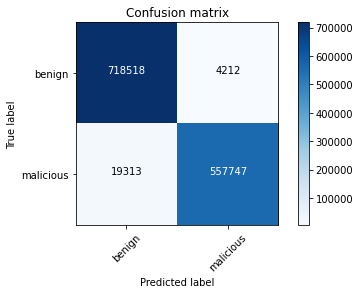

In [125]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm,classes=['benign','malicious'])

In [126]:

lgb_feature = lgb.feature_importances_
lgb_feature

array([307,  74, 175, 584, 100,  46, 244, 190, 181, 201, 546, 352])

In [129]:
# del LGB_C

NameError: ignored

In [127]:
lgb_features = lgb_feature.tolist()

In [130]:
model = xgb.XGBClassifier(n_estimators= 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

[06:10:03] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    722730
           1       0.99      0.96      0.97    577060

    accuracy                           0.98   1299790
   macro avg       0.98      0.98      0.98   1299790
weighted avg       0.98      0.98      0.98   1299790

accuracy:   0.978


In [131]:
# save the trained model in pkl format
filename = 'xgboost_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [132]:
!cp /content/lgb_model.pkl /content/drive/MyDrive/MCS/MCS9thMarch/fakeBenignAndMaliciousBiggerLinks
!cp /content/xgboost_model.pkl /content/drive/MyDrive/MCS/MCS9thMarch/fakeBenignAndMaliciousBiggerLinks

Confusion matrix, without normalization


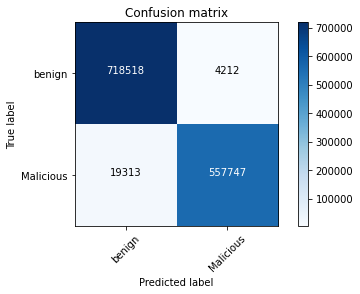

In [133]:
CM=confusion_matrix(y_test, y_pred, labels=[0,1])

plot_confusion_matrix(cm,classes=['benign','Malicious'])

In [134]:
xgb_feature = model.feature_importances_
xgb_features = xgb_feature.tolist()

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbdt.fit(X_train,y_train)
y_pred = gbdt.predict(X_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    722730
           1       0.99      0.96      0.97    577060

    accuracy                           0.98   1299790
   macro avg       0.98      0.98      0.98   1299790
weighted avg       0.98      0.98      0.98   1299790

accuracy:   0.977


In [136]:
with open('gbdt_model.pkl', 'wb') as f:
    pickle.dump(gbdt, f)

In [137]:
!cp /content/gbdt_model.pkl /content/drive/MyDrive/MCS/MCS9thMarch/fakeBenignAndMaliciousBiggerLinks

Confusion matrix, without normalization


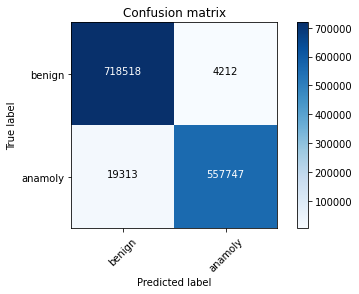

In [138]:
CM=confusion_matrix(y_test, y_pred, labels=[0,1])

plot_confusion_matrix(cm,classes=['benign', 'anamoly'])

In [139]:
gbdt_feature = gbdt.feature_importances_
gbdt_features = gbdt_feature.tolist()

In [140]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Define the random forest classifier with desired hyperparameters
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy: %0.3f" % score)

# Save the trained model in pickle format
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98    722730
           1       0.99      0.96      0.98    577060

    accuracy                           0.98   1299790
   macro avg       0.98      0.98      0.98   1299790
weighted avg       0.98      0.98      0.98   1299790

accuracy: 0.979


In [143]:
!cp /content/random_forest_model.pkl /content/drive/MyDrive/MCS/MCS9thMarch/fakeBenignAndMaliciousBiggerLinks

Confusion matrix, without normalization


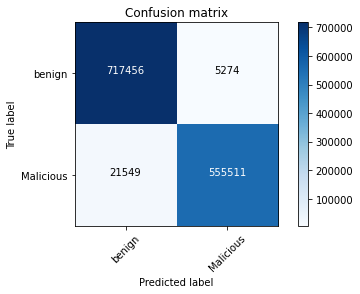

In [142]:
CM=confusion_matrix(y_test, y_pred, labels=[0,1])

plot_confusion_matrix(cm,classes=['benign','Malicious'])

In [144]:
cols = X_train.columns
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
    
    'Gradient Boost feature importances': gbdt_features,
    'XG Boost feature importances': xgb_features,
    'LGBM feature importances': lgb_features
                                   
    })
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

<ipython-input-144-f0a943df1292>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise


,features,Gradient Boost feature importances,XG Boost feature importances,LGBM feature importances,mean
0,count.,0.613506,0.786828,307,102.800111
1,count-www,0.005771,0.023855,74,24.676542
2,count@,0.004664,0.017981,175,58.340882


<ipython-input-145-5750c4c57e65>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


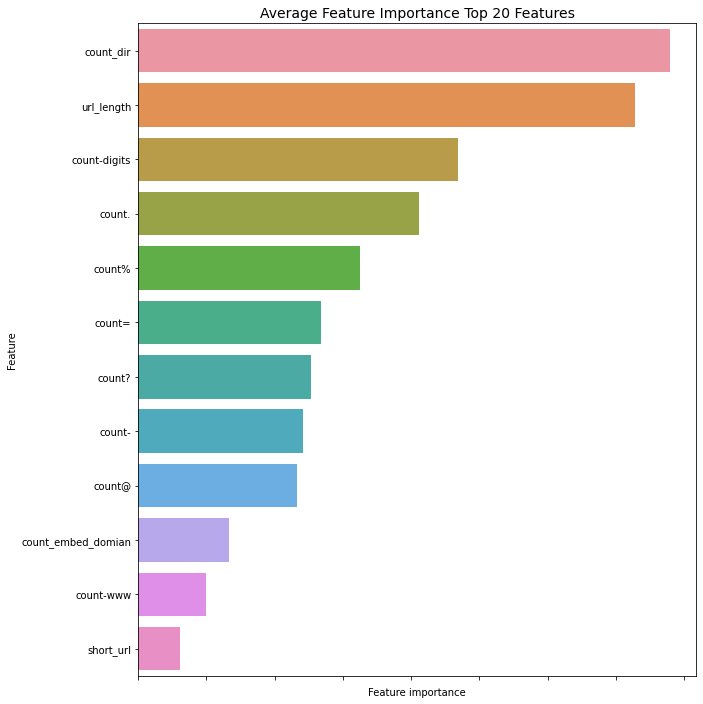

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': X_test.columns, 'Feature importance': feature_dataframe['mean'].values})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(20)
    plt.figure(figsize = (10,12))
    plt.title('Average Feature Importance Top 20 Features',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
plot_feature_importance()

In [ ]:
import pickle

# Train and save XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators= 100)
xgb_model.fit(X_train,y_train)
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Train and save LightGBM model
lgb_model = LGBMClassifier(objective='binary',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
lgb_model.fit(X_train, y_train)
with open('lgb_model.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)

# Train and save Gradient Boosting model
gbdt_model = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbdt_model.fit(X_train,y_train)
with open('gbdt_model.pkl', 'wb') as f:
    pickle.dump(gbdt_model, f)
